<a href="https://colab.research.google.com/github/AndersonLopesbh/I.S/blob/main/Analises%20IS/Script_python/Analises_IS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Proposta de Trabalho

Avaliação de Competências Técnicas de Analíticas para Desenvolvedor de Banco de Dados em Python (DBM)

**Objetivo:** Esta avaliação visa analisar suas habilidades técnicas em Python, capacidades analíticas e estatísticas, e sua resposta a situações adversas e desconhecidas, usando o dataset do Censo Escolar de 2022, com foco específico em análise de perfil para prospecção em escolas particulares.

**Dataset:**
 O dataset pode ser acessado através do link: Censo Escolar 2022 - Dados Abertos.

**Tarefas:**
Extração e Tratamento de Dados: Extraia os dados relevantes, com ênfase nas escolas particulares. Realize a limpeza e organização dos dados, excluindo informações não relacionadas ao objetivo do estudo (como campos de saneamento básico), e tratando inconsistências.

**Análise Exploratória e Foco do Estudo:**
Conduza uma análise exploratória focada em identificar informações úteis para a prospecção em escolas particulares. Identifique e justifique quais campos são relevantes para o objetivo do estudo.

**Análise Estatística:**
Aplique técnicas de estatística descritiva e inferencial nos dados relevantes.

**Visualização de Dados:**
Crie visualizações que destaquem informações pertinentes para a prospecção em escolas particulares.

**Interpretação e Conclusões:** Apresente insights e conclusões baseadas na sua análise, focando em aspectos relevantes para a prospecção.

**Documentação e Código:** Seu código deve ser claro, bem documentado e eficiente.

**Resposta a Adversidades:** Esteja preparado para discutir desafios enfrentados durante a análise e como você os superou.

**Entrega:**
▪ Uma apresentação (slides) resumindo sua análise e conclusões;
▪ O código fonte desenvolvido, preferencialmente em um repositório Git;
▪ Um relatório detalhando sua abordagem e métodos utilizados.
Avaliação: Você será avaliado pela capacidade analítica, técnica em Python e estatística, pelo CENSO crítico na seleção de dados relevantes e como responde a adversidades e desafios não previstos.

Prazo de Entrega: 10 dias corridos.

# 2 - Estratégia de Dados

1.   Uma vez que a base em CSV de 2022 tem 185mb e o GitHub suporta somente arquivos até 25MB, utilizaremos uma pasta como repositório dos arquivos em:
https://drive.google.com/drive/folders/1UrDDx0DKRgX4SR5nrssTdVLnjAOwcVFT?usp=drive_link

2.   Nesta pasta ficarão disponíveis as bases de 2016 a 2022 com foco no ultimo arquivo de 2022.

3.   Caso haja possibilidade, observando o desempenho e memória, iremos concatenar os demais anos do CENSO.

# 3 - Bibliotecas a utilizadas

In [34]:
# Abaixo seram importadas as bibliotecas necessárias para manipulação dos dados e demais analises

#Pandas leitura e tratamentod dos Data Frames
import pandas as pd

#Bibliotecas de graficos para analises visuais
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# 4 - Extração dos dados

In [35]:
# Vamos começar abaixo a captura dos dados em CSV
# o comando abaixo vai criar a conexão com o link da pasta dos arquivos CSV no google drive

from google.colab import drive
link_pastas='https://drive.google.com/drive/folders/1UrDDx0DKRgX4SR5nrssTdVLnjAOwcVFT?usp=drive_link'

#Criando uma pasta Drive_analise_IS e montando a mesma no Google colab do usuário que estiver utilizando o script

'''SERÁ NECESSÁRIO LOGAR NO GOOGLE DRIVE COM AS DEVIDAS PERMISSÕES!!!!!!!'''

pasta =link_pastas.split('/')[-1]
drive.mount('/content/Drive_analise_IS', force_remount=True)
folder_path = f'/content/drive/My Drive/{pasta}'

Mounted at /content/Drive_analise_IS


In [36]:
# criando data set/frame com os dados / OBS: o foco da analise esta no arquivo 2022, devido ao limite de memoria do google colabs, manterei os arquivos comentados

#csv_2016 = '/content/Drive_analise_IS/MyDrive/ANALISE_IS/microdados_2016.csv'
#csv_2017 = '/content/Drive_analise_IS/MyDrive/ANALISE_IS/microdados_2017.csv'
#csv_2018 = '/content/Drive_analise_IS/MyDrive/ANALISE_IS/microdados_2018.csv'
#csv_2019 = '/content/Drive_analise_IS/MyDrive/ANALISE_IS/microdados_2019.csv'
#csv_2020 = '/content/Drive_analise_IS/MyDrive/ANALISE_IS/microdados_2020.csv'
#csv_2021 = '/content/Drive_analise_IS/MyDrive/ANALISE_IS/microdados_2021.csv'
csv_2022 = '/content/Drive_analise_IS/MyDrive/ANALISE_IS/microdados_2022.csv'


In [37]:
# Carregando os dados CVS para Data Frames, já trabalhando a leitura destes dados que se encontram separados por
#';' que não se encontram no formato utf8 e lendo-os como Latin-1.

#df_2016 = pd.read_csv(csv_2016,header=0,sep=';',encoding='Latin-1')
#df_2017 = pd.read_csv(csv_2017,header=0,sep=';',encoding='Latin-1')
#df_2018 = pd.read_csv(csv_2018,header=0,sep=';',encoding='Latin-1')
#df_2019 = pd.read_csv(csv_2019,header=0,sep=';',encoding='Latin-1')
#df_2020 = pd.read_csv(csv_2020,header=0,sep=';',encoding='Latin-1')
#df_2021 = pd.read_csv(csv_2021,header=0,sep=';',encoding='Latin-1')
df_2022 = pd.read_csv(csv_2022,header=0,sep=';',encoding='Latin-1')

<ipython-input-37-8c5a900de62b>:10: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv(csv_2022,header=0,sep=';',encoding='Latin-1')


# 5 - Análise Exploratória e transformação dos dados

Para uma análise exploratória simples, utilizarei os comandos básicos da biblioteca do pandas, utilizando o Data Frame de 2022 afim de verificar a massa de colunas e registros.(Data frames de 2016 a 2021 ficarão fora da analise a priori)

In [38]:
#Realizando una analise dos data frames de forma macro em numero de colunas e linhas

#print('Data Frame 2016',df_2016.shape[1],'colunas e ',df_2016.shape[0],' linhas')
#print('Data Frame 2017',df_2017.shape[1],'colunas e ',df_2017.shape[0],' linhas')
#print('Data Frame 2018',df_2018.shape[1],'colunas e ',df_2018.shape[0],' linhas')
#print('Data Frame 2019',df_2019.shape[1],'colunas e ',df_2019.shape[0],' linhas')
#print('Data Frame 2020',df_2020.shape[1],'colunas e ',df_2020.shape[0],' linhas')
#print('Data Frame 2021',df_2021.shape[1],'colunas e ',df_2021.shape[0],' linhas')
print('Data Frame 2022',df_2022.shape[1],'colunas e ',df_2022.shape[0],' linhas')

Data Frame 2022 385 colunas e  224649  linhas


Em uma analise a parte, verifiquei que trabalhando em 2022 com 15 colunas a mais de informações quanto aos anos 2016 a 2021, sendo necessário analisarmos no dicionário de dados, quais são estas colunas e e real necessidade de inclusão das mesmas na análise.

Alem de visivelmente, termos uma redução  no numero de registros a partir do CENSO de 2019, o que pode influenciar em estudos históricos.



* Censo 2016 370 colunas e  **237506**  linhas
* Censo 2017 370 colunas e  **236481**  linhas
* Censo 2018 370 colunas e  **236460**  linhas
* Censo 2019 370 colunas e  228521  linhas
* Censo 2020 370 colunas e  224229  linhas
* Censo 2021 370 colunas e  221140  linhas
* Censo 2022 385 colunas e  224649  linhas

In [39]:
'''EXECUTAR ESTA PARTE SOMENTE SE UTILIZAR TODOS OS DATA FRAMES, O MESMO FOI EXECUTADO EM ANALISE INICIAL , RETIRADO DEVIDO A FALTA DE MEMORIA '''
#Abaixo comparamos os data frames de 2021 e 2022 para sabermos quais colunas são diferentes de um ano para outro
#com esta comparação iremos decidir junto ao dicionário de Dados se devemos remove-las do data frame de 2022
#mediante a importancia das mesmas
'''
colunas_diferentes = sorted(list(set(df_2022.columns).difference(df_2021.columns)))

print("Colunas diferentes entre os DataFrames:\n")
for coluna in colunas_diferentes:
    print(coluna)'''

'\ncolunas_diferentes = sorted(list(set(df_2022.columns).difference(df_2021.columns)))\n\nprint("Colunas diferentes entre os DataFrames:\n")\nfor coluna in colunas_diferentes:\n    print(coluna)'

Quando consultamos o dicionário de dados de 2022, podemos verificar que os campos foram acresendados apenas neste CENSO, dados vinculados a assuntos de:

- Forma de contratação
- Tipos de atendimentos ofertados
- Dependências físicas

Sendo assim, estes campos serão descastados, para que haja paridade com os demais CENSOs passados, uma vez também que os mesmos não agregam valor ao foco deste estudo.

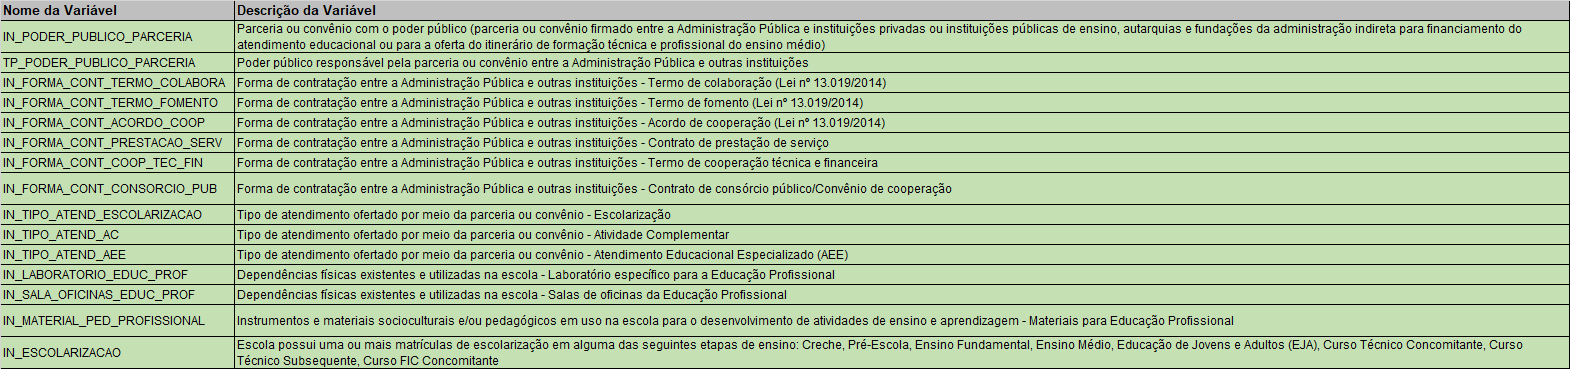

In [40]:
# Com o auxílio da função append do Pandas vamos concatenar nossos data frames (neste caso somente 2022 foi utilizado)

df_censo = pd.concat([df_2022], ignore_index=True)

Uma vez anteriomente analisado que o data frame de 2022, possui 15 colunas a mais dos demais CENSOs passados, vamos ignora-los e unir todos os data frames de 2016 a 2022 em um único data frame, possibilitando um estudo amplo com uma série histórica maior. '''ESTA PARTE SÓ DEVE SER CONSIDERADA SE ANALISARMOS SE UTILIZARMOS TODOS OS DATA FRAMES, A PRIORE UTILIZAREMOS O DE 2022'''

## 5.1 - Reestruturação da Análise Exploratória

## 5.2 - Exploração inicial do Data Frame

In [42]:
'''UTILIZAR SOMENTE SE INCLUIR DEMAIS ANOS'''
'''# Liberando espaço do Gooble Colabs apagando a referencia aos antigos csv's
del csv_2019,csv_2020,csv_2021,csv_2022

# Liberando espaço do Gooble Colabs apagando os antigos data frames
del df_2019,df_2020,df_2021,df_2022
'''


"# Liberando espaço do Gooble Colabs apagando a referencia aos antigos csv's\ndel csv_2019,csv_2020,csv_2021,csv_2022\n\n# Liberando espaço do Gooble Colabs apagando os antigos data frames\ndel df_2019,df_2020,df_2021,df_2022\n"

In [43]:
#Leitura das primeiras linhas conferindo o inicio do arquivo
print(df_censo.head())


   NU_ANO_CENSO NO_REGIAO  CO_REGIAO     NO_UF SG_UF  CO_UF  \
0          2022     Norte          1  Rondônia    RO     11   
1          2022     Norte          1  Rondônia    RO     11   
2          2022     Norte          1  Rondônia    RO     11   
3          2022     Norte          1  Rondônia    RO     11   
4          2022     Norte          1  Rondônia    RO     11   

            NO_MUNICIPIO  CO_MUNICIPIO     NO_MESORREGIAO  CO_MESORREGIAO  \
0  Alta Floresta D'Oeste       1100015  Leste Rondoniense               2   
1  Alta Floresta D'Oeste       1100015  Leste Rondoniense               2   
2  Alta Floresta D'Oeste       1100015  Leste Rondoniense               2   
3  Alta Floresta D'Oeste       1100015  Leste Rondoniense               2   
4  Alta Floresta D'Oeste       1100015  Leste Rondoniense               2   

   ... QT_TUR_FUND_AF  QT_TUR_MED  QT_TUR_PROF QT_TUR_PROF_TEC  QT_TUR_EJA  \
0  ...            0.0         0.0          0.0             0.0         0.0   
1 

In [44]:
#Leitura das ultimas linhas conferindo o fim do arquivo
df_censo.tail()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
224644,2022,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,Distrito Federal,1,...,1.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
224645,2022,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,Distrito Federal,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224646,2022,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,Distrito Federal,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224647,2022,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,Distrito Federal,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224648,2022,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,Distrito Federal,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Vamos analisar os dados gerais do data frame
df_censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224649 entries, 0 to 224648
Columns: 385 entries, NU_ANO_CENSO to QT_TUR_ESP_CE
dtypes: float64(358), int64(11), object(16)
memory usage: 659.9+ MB


In [46]:
# Alguns dados estatísticos sobre o DataFrame oferecido pela biblioteca do pandas (aleatório, uma vez que a base possui muitas colunas) os refinamentos serão feitos por assunto nas analises.
print(df_censo.describe())


       NU_ANO_CENSO      CO_REGIAO          CO_UF  CO_MUNICIPIO  \
count      224649.0  224649.000000  224649.000000  2.246490e+05   
mean         2022.0       2.647040      30.259347  3.041188e+06   
std             0.0       1.022897       9.447640  9.484777e+05   
min          2022.0       1.000000      11.000000  1.100015e+06   
25%          2022.0       2.000000      23.000000  2.313005e+06   
50%          2022.0       3.000000      31.000000  3.112604e+06   
75%          2022.0       3.000000      35.000000  3.547304e+06   
max          2022.0       5.000000      53.000000  5.300108e+06   

       CO_MESORREGIAO  CO_MICRORREGIAO   CO_DISTRITO   CO_ENTIDADE  \
count   224649.000000    224649.000000  2.246490e+05  2.246490e+05   
mean         5.019159        19.830447  3.041188e+08  3.042829e+07   
std          3.872808        17.119943  9.484777e+07  9.449441e+06   
min          1.000000         1.000000  1.100015e+08  1.100002e+07   
25%          2.000000         7.000000  2.3130

Realizando uma leitura com a inclusão dos data frames de 2016 a 2022 estaríamos trabalhando com 1.608.985 de registros e 385 colunas iniciais, das quais iniciaremos uma limpeza (higienização) de colunas as quais não utilizaremos, assim como linhas de registros que não nos serão uteis , como de registros de entidades não privadas, colunas sem valores e linhas vazias. Todavia inicialmente trabalharemos com o DataFrame de 2022 que possui 385 colunas e 224.649 registros.

In [47]:
# Vamos iniciar a higienização, excluindo os 15 campos novos incluidos no CENSO de 2022 que para este momento não agregarão valor e ficaremos com as 370 colunas
# que são comuns aos demais censos
colNovoCENSO = ['IN_PODER_PUBLICO_PARCERIA','TP_PODER_PUBLICO_PARCERIA','IN_FORMA_CONT_TERMO_COLABORA','IN_FORMA_CONT_TERMO_FOMENTO','IN_FORMA_CONT_ACORDO_COOP','IN_FORMA_CONT_PRESTACAO_SERV','IN_FORMA_CONT_COOP_TEC_FIN','IN_FORMA_CONT_CONSORCIO_PUB','IN_TIPO_ATEND_ESCOLARIZACAO','IN_TIPO_ATEND_AC','IN_TIPO_ATEND_AEE','IN_LABORATORIO_EDUC_PROF','IN_SALA_OFICINAS_EDUC_PROF','IN_MATERIAL_PED_PROFISSIONAL','IN_ESCOLARIZACAO']
df_censo=df_censo.drop(colNovoCENSO,axis=1)



In [48]:
# Relendo a quantidade de colunas
df_censo.head()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,10.0,6.0,4.0,3.0,3.0,0.0
2,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0


Os dados do CENSO foram divididos em categorias(vide dicionário de dados), são estas:

*   Cadastro da Escola
*   Dados da escola
*   Dados de oferta de matrícula
*   Número de Matrículas na Educação Básica
*   Número de Matrículas na Educação Básica - Segundo o Gênero do Aluno
*   Número de Matrículas na Educação Básica - Segundo a Cor/Raça do Aluno
*   Número de Matrículas na Educação Básica - Segundo a Faixa Etária do Aluno
*   Número de Matrículas na Educação Básica - Segundo o Turno do Aluno
*   Número de Matrículas na Educação Básica - Tempo Integral (Turma com sete ou mais horas de duração diária)
*   Número de Docentes da Educação Básica
*   Número de Turmas de Educação Básica

Dentre estas categorias, vamos excluir colunas a priori não desnecessárias, que são referentes ao tipo de estrutura fisica das entidades e vamos ficar com as quantitativas e de subdvisão das entidades privadas e localização, as demais abaixo serão descartadas:

 'NU_DDD','NU_TELEFONE','IN_VINCULO_SECRETARIA_EDUCACAO','IN_VINCULO_SEGURANCA_PUBLICA','IN_VINCULO_SECRETARIA_SAUDE','IN_VINCULO_OUTRO_ORGAO',
'IN_CONVENIADA_PP','TP_CONVENIO_PODER_PUBLICO','NU_CNPJ_ESCOLA_PRIVADA','NU_CNPJ_MANTENEDORA','TP_RESPONSAVEL_REGULAMENTACAO','CO_ESCOLA_SEDE_VINCULADA',
'CO_IES_OFERTANTE','IN_LOCAL_FUNC_PREDIO_ESCOLAR','TP_OCUPACAO_PREDIO_ESCOLAR','IN_LOCAL_FUNC_SALAS_EMPRESA','IN_LOCAL_FUNC_SOCIOEDUCATIVO',
'IN_LOCAL_FUNC_UNID_PRISIONAL','IN_LOCAL_FUNC_PRISIONAL_SOCIO','IN_LOCAL_FUNC_CASA_PROFESSOR','IN_LOCAL_FUNC_GALPAO','TP_OCUPACAO_GALPAO',
'IN_LOCAL_FUNC_SALAS_OUTRA_ESC','IN_LOCAL_FUNC_OUTROS','IN_PREDIO_COMPARTILHADO','IN_AGUA_FILTRADA','IN_AGUA_POTAVEL','IN_AGUA_REDE_PUBLICA',
'IN_AGUA_POCO_ARTESIANO','IN_AGUA_CACIMBA','IN_AGUA_FONTE_RIO','IN_AGUA_INEXISTENTE','IN_ENERGIA_REDE_PUBLICA','IN_ENERGIA_GERADOR',
'IN_ENERGIA_GERADOR_FOSSIL','IN_ENERGIA_OUTROS','IN_ENERGIA_RENOVAVEL','IN_ENERGIA_INEXISTENTE','IN_ESGOTO_REDE_PUBLICA','IN_ESGOTO_FOSSA_SEPTICA','IN_ESGOTO_FOSSA_COMUM','IN_ESGOTO_FOSSA',
'IN_ESGOTO_INEXISTENTE','IN_LIXO_SERVICO_COLETA','IN_LIXO_QUEIMA','IN_LIXO_ENTERRA','IN_LIXO_DESTINO_FINAL_PUBLICO','IN_LIXO_DESCARTA_OUTRA_AREA',
'IN_LIXO_JOGA_OUTRA_AREA','IN_LIXO_OUTROS','IN_LIXO_RECICLA','IN_TRATAMENTO_LIXO_SEPARACAO','IN_TRATAMENTO_LIXO_REUTILIZA','IN_TRATAMENTO_LIXO_RECICLAGEM',
'IN_TRATAMENTO_LIXO_INEXISTENTE','IN_ALMOXARIFADO','IN_AREA_VERDE','IN_AUDITORIO','IN_BANHEIRO_FORA_PREDIO','IN_BANHEIRO_DENTRO_PREDIO','IN_BANHEIRO',
'IN_BANHEIRO_EI','IN_BANHEIRO_PNE','IN_BANHEIRO_FUNCIONARIOS','IN_BANHEIRO_CHUVEIRO','IN_BERCARIO','IN_BIBLIOTECA','IN_BIBLIOTECA_SALA_LEITURA','IN_COZINHA',
'IN_DESPENSA','IN_DORMITORIO_ALUNO','IN_DORMITORIO_PROFESSOR','IN_LABORATORIO_CIENCIAS','IN_PATIO_COBERTO','IN_PATIO_DESCOBERTO','IN_PARQUE_INFANTIL',
'IN_PISCINA','IN_QUADRA_ESPORTES','IN_QUADRA_ESPORTES_COBERTA','IN_QUADRA_ESPORTES_DESCOBERTA','IN_REFEITORIO','IN_SALA_ATELIE_ARTES','IN_SALA_ESTUDIO_DANCA',
'IN_SALA_MULTIUSO','IN_SALA_DIRETORIA','IN_SALA_LEITURA','IN_SALA_PROFESSOR','IN_SALA_REPOUSO_ALUNO','IN_SECRETARIA','IN_TERREIRAO','IN_VIVEIRO',
'IN_DEPENDENCIAS_PNE','IN_LAVANDERIA','IN_DEPENDENCIAS_OUTRAS','IN_ACESSIBILIDADE_CORRIMAO','IN_ACESSIBILIDADE_ELEVADOR','IN_ACESSIBILIDADE_PISOS_TATEIS',
'IN_ACESSIBILIDADE_VAO_LIVRE','IN_ACESSIBILIDADE_RAMPAS','IN_ACESSIBILIDADE_SINAL_SONORO','IN_ACESSIBILIDADE_SINAL_TATIL','IN_ACESSIBILIDADE_SINAL_VISUAL',
'IN_ACESSIBILIDADE_INEXISTENTE','QT_SALAS_UTILIZADAS_DENTRO','QT_SALAS_UTILIZADAS_FORA','QT_SALAS_UTILIZA_CLIMATIZADAS','QT_SALAS_UTILIZADAS_ACESSIVEIS',
'IN_EQUIP_PARABOLICA','IN_COMPUTADOR','IN_EQUIP_COPIADORA','IN_EQUIP_IMPRESSORA','IN_EQUIP_IMPRESSORA_MULT','IN_EQUIP_SCANNER','IN_EQUIP_NENHUM',
'IN_EQUIP_DVD','QT_EQUIP_DVD','IN_EQUIP_SOM','QT_EQUIP_SOM','IN_EQUIP_TV','QT_EQUIP_TV','IN_EQUIP_LOUSA_DIGITAL','QT_EQUIP_LOUSA_DIGITAL',
'IN_EQUIP_MULTIMIDIA','QT_EQUIP_MULTIMIDIA','IN_EQUIP_VIDEOCASSETE','IN_EQUIP_RETROPROJETOR','IN_EQUIP_FAX','IN_EQUIP_FOTO','QT_EQUIP_VIDEOCASSETE',
'QT_EQUIP_PARABOLICA','QT_EQUIP_COPIADORA','QT_EQUIP_RETROPROJETOR','QT_EQUIP_IMPRESSORA','QT_EQUIP_IMPRESSORA_MULT','QT_EQUIP_FAX','QT_EQUIP_FOTO',
'IN_INTERNET_ADMINISTRATIVO','IN_INTERNET_COMUNIDADE','TP_REDE_LOCAL','IN_BANDA_LARGA','IN_PROF_ADMINISTRATIVOS','QT_PROF_ADMINISTRATIVOS','IN_PROF_SERVICOS_GERAIS',
'QT_PROF_SERVICOS_GERAIS','IN_PROF_BIBLIOTECARIO','QT_PROF_BIBLIOTECARIO','IN_PROF_SAUDE','QT_PROF_SAUDE','IN_PROF_COORDENADOR','QT_PROF_COORDENADOR',
'IN_PROF_FONAUDIOLOGO','QT_PROF_FONAUDIOLOGO','IN_PROF_NUTRICIONISTA','QT_PROF_NUTRICIONISTA','IN_PROF_PSICOLOGO','QT_PROF_PSICOLOGO','IN_PROF_ALIMENTACAO',
'QT_PROF_ALIMENTACAO','IN_PROF_PEDAGOGIA','QT_PROF_PEDAGOGIA','IN_PROF_SECRETARIO','QT_PROF_SECRETARIO','IN_PROF_SEGURANCA','QT_PROF_SEGURANCA','IN_PROF_MONITORES',
'QT_PROF_MONITORES','IN_PROF_GESTAO','QT_PROF_GESTAO','IN_PROF_ASSIST_SOCIAL','QT_PROF_ASSIST_SOCIAL','IN_ALIMENTACAO','IN_MATERIAL_PED_DESPORTIVA',
'IN_MATERIAL_PED_INDIGENA','IN_MATERIAL_PED_ETNICO','IN_MATERIAL_PED_CAMPO','IN_MATERIAL_PED_NENHUM','IN_MATERIAL_ESP_QUILOMBOLA','IN_MATERIAL_ESP_INDIGENA',
'IN_MATERIAL_ESP_NAO_UTILIZA','TP_INDIGENA_LINGUA','CO_LINGUA_INDIGENA_1','CO_LINGUA_INDIGENA_2','CO_LINGUA_INDIGENA_3','IN_REDES_SOCIAIS',
'IN_ESPACO_ATIVIDADE','IN_ESPACO_EQUIPAMENTO','IN_ORGAO_ASS_PAIS','IN_ORGAO_ASS_PAIS_MESTRES','IN_ORGAO_CONSELHO_ESCOLAR','IN_ORGAO_GREMIO_ESTUDANTIL',
'IN_ORGAO_OUTROS','IN_ORGAO_NENHUM','TP_PROPOSTA_PEDAGOGICA','TP_AEE','TP_ATIVIDADE_COMPLEMENTAR','IN_PROF','IN_PROF_TEC','IN_EJA','IN_EJA_FUND',
'IN_EJA_MED','IN_ESP','IN_ESP_CC','IN_ESP_CE','QT_MAT_PROF_TEC','QT_MAT_EJA','QT_MAT_EJA_FUND','QT_MAT_EJA_MED','QT_MAT_ESP','QT_MAT_ESP_CC','QT_MAT_ESP_CE'






In [49]:
# Excluindo outras colunas que não utilizaremos a priori, pois são dados interligados em sua maioria a analise de estrutura
# física e dos ambiente das instituições.

colexpurgoCENSO = ['NU_DDD','NU_TELEFONE','IN_VINCULO_SECRETARIA_EDUCACAO','IN_VINCULO_SEGURANCA_PUBLICA','IN_VINCULO_SECRETARIA_SAUDE','IN_VINCULO_OUTRO_ORGAO',
'IN_CONVENIADA_PP','TP_CONVENIO_PODER_PUBLICO','NU_CNPJ_ESCOLA_PRIVADA','NU_CNPJ_MANTENEDORA','TP_RESPONSAVEL_REGULAMENTACAO','CO_ESCOLA_SEDE_VINCULADA',
'CO_IES_OFERTANTE','IN_LOCAL_FUNC_PREDIO_ESCOLAR','TP_OCUPACAO_PREDIO_ESCOLAR','IN_LOCAL_FUNC_SALAS_EMPRESA','IN_LOCAL_FUNC_SOCIOEDUCATIVO',
'IN_LOCAL_FUNC_UNID_PRISIONAL','IN_LOCAL_FUNC_PRISIONAL_SOCIO','IN_LOCAL_FUNC_CASA_PROFESSOR','IN_LOCAL_FUNC_GALPAO','TP_OCUPACAO_GALPAO',
'IN_LOCAL_FUNC_SALAS_OUTRA_ESC','IN_LOCAL_FUNC_OUTROS','IN_PREDIO_COMPARTILHADO','IN_AGUA_FILTRADA','IN_AGUA_POTAVEL','IN_AGUA_REDE_PUBLICA',
'IN_AGUA_POCO_ARTESIANO','IN_AGUA_CACIMBA','IN_AGUA_FONTE_RIO','IN_AGUA_INEXISTENTE','IN_ENERGIA_REDE_PUBLICA','IN_ENERGIA_GERADOR',
'IN_ENERGIA_GERADOR_FOSSIL','IN_ENERGIA_OUTROS','IN_ENERGIA_RENOVAVEL','IN_ENERGIA_INEXISTENTE','IN_ESGOTO_REDE_PUBLICA','IN_ESGOTO_FOSSA_SEPTICA','IN_ESGOTO_FOSSA_COMUM','IN_ESGOTO_FOSSA',
'IN_ESGOTO_INEXISTENTE','IN_LIXO_SERVICO_COLETA','IN_LIXO_QUEIMA','IN_LIXO_ENTERRA','IN_LIXO_DESTINO_FINAL_PUBLICO','IN_LIXO_DESCARTA_OUTRA_AREA',
'IN_LIXO_JOGA_OUTRA_AREA','IN_LIXO_OUTROS','IN_LIXO_RECICLA','IN_TRATAMENTO_LIXO_SEPARACAO','IN_TRATAMENTO_LIXO_REUTILIZA','IN_TRATAMENTO_LIXO_RECICLAGEM',
'IN_TRATAMENTO_LIXO_INEXISTENTE','IN_ALMOXARIFADO','IN_AREA_VERDE','IN_AUDITORIO','IN_BANHEIRO_FORA_PREDIO','IN_BANHEIRO_DENTRO_PREDIO','IN_BANHEIRO',
'IN_BANHEIRO_EI','IN_BANHEIRO_PNE','IN_BANHEIRO_FUNCIONARIOS','IN_BANHEIRO_CHUVEIRO','IN_BERCARIO','IN_BIBLIOTECA','IN_BIBLIOTECA_SALA_LEITURA','IN_COZINHA',
'IN_DESPENSA','IN_DORMITORIO_ALUNO','IN_DORMITORIO_PROFESSOR','IN_LABORATORIO_CIENCIAS','IN_PATIO_COBERTO','IN_PATIO_DESCOBERTO','IN_PARQUE_INFANTIL',
'IN_PISCINA','IN_QUADRA_ESPORTES','IN_QUADRA_ESPORTES_COBERTA','IN_QUADRA_ESPORTES_DESCOBERTA','IN_REFEITORIO','IN_SALA_ATELIE_ARTES','IN_SALA_ESTUDIO_DANCA',
'IN_SALA_MULTIUSO','IN_SALA_DIRETORIA','IN_SALA_LEITURA','IN_SALA_PROFESSOR','IN_SALA_REPOUSO_ALUNO','IN_SECRETARIA','IN_TERREIRAO','IN_VIVEIRO',
'IN_DEPENDENCIAS_PNE','IN_LAVANDERIA','IN_DEPENDENCIAS_OUTRAS','IN_ACESSIBILIDADE_CORRIMAO','IN_ACESSIBILIDADE_ELEVADOR','IN_ACESSIBILIDADE_PISOS_TATEIS',
'IN_ACESSIBILIDADE_VAO_LIVRE','IN_ACESSIBILIDADE_RAMPAS','IN_ACESSIBILIDADE_SINAL_SONORO','IN_ACESSIBILIDADE_SINAL_TATIL','IN_ACESSIBILIDADE_SINAL_VISUAL',
'IN_ACESSIBILIDADE_INEXISTENTE','QT_SALAS_UTILIZADAS_DENTRO','QT_SALAS_UTILIZADAS_FORA','QT_SALAS_UTILIZA_CLIMATIZADAS','QT_SALAS_UTILIZADAS_ACESSIVEIS',
'IN_EQUIP_PARABOLICA','IN_COMPUTADOR','IN_EQUIP_COPIADORA','IN_EQUIP_IMPRESSORA','IN_EQUIP_IMPRESSORA_MULT','IN_EQUIP_SCANNER','IN_EQUIP_NENHUM',
'IN_EQUIP_DVD','QT_EQUIP_DVD','IN_EQUIP_SOM','QT_EQUIP_SOM','IN_EQUIP_TV','QT_EQUIP_TV','IN_EQUIP_LOUSA_DIGITAL','QT_EQUIP_LOUSA_DIGITAL',
'IN_EQUIP_MULTIMIDIA','QT_EQUIP_MULTIMIDIA','IN_EQUIP_VIDEOCASSETE','IN_EQUIP_RETROPROJETOR','IN_EQUIP_FAX','IN_EQUIP_FOTO','QT_EQUIP_VIDEOCASSETE',
'QT_EQUIP_PARABOLICA','QT_EQUIP_COPIADORA','QT_EQUIP_RETROPROJETOR','QT_EQUIP_IMPRESSORA','QT_EQUIP_IMPRESSORA_MULT','QT_EQUIP_FAX','QT_EQUIP_FOTO',
'IN_INTERNET_ADMINISTRATIVO','IN_INTERNET_COMUNIDADE','TP_REDE_LOCAL','IN_BANDA_LARGA','IN_PROF_ADMINISTRATIVOS','QT_PROF_ADMINISTRATIVOS','IN_PROF_SERVICOS_GERAIS',
'QT_PROF_SERVICOS_GERAIS','IN_PROF_BIBLIOTECARIO','QT_PROF_BIBLIOTECARIO','IN_PROF_SAUDE','QT_PROF_SAUDE','IN_PROF_COORDENADOR','QT_PROF_COORDENADOR',
'IN_PROF_FONAUDIOLOGO','QT_PROF_FONAUDIOLOGO','IN_PROF_NUTRICIONISTA','QT_PROF_NUTRICIONISTA','IN_PROF_PSICOLOGO','QT_PROF_PSICOLOGO','IN_PROF_ALIMENTACAO',
'QT_PROF_ALIMENTACAO','IN_PROF_PEDAGOGIA','QT_PROF_PEDAGOGIA','IN_PROF_SECRETARIO','QT_PROF_SECRETARIO','IN_PROF_SEGURANCA','QT_PROF_SEGURANCA','IN_PROF_MONITORES',
'QT_PROF_MONITORES','IN_PROF_GESTAO','QT_PROF_GESTAO','IN_PROF_ASSIST_SOCIAL','QT_PROF_ASSIST_SOCIAL','IN_ALIMENTACAO','IN_MATERIAL_PED_DESPORTIVA',
'IN_MATERIAL_PED_INDIGENA','IN_MATERIAL_PED_ETNICO','IN_MATERIAL_PED_CAMPO','IN_MATERIAL_PED_NENHUM','IN_MATERIAL_ESP_QUILOMBOLA','IN_MATERIAL_ESP_INDIGENA',
'IN_MATERIAL_ESP_NAO_UTILIZA','TP_INDIGENA_LINGUA','CO_LINGUA_INDIGENA_1','CO_LINGUA_INDIGENA_2','CO_LINGUA_INDIGENA_3','IN_REDES_SOCIAIS',
'IN_ESPACO_ATIVIDADE','IN_ESPACO_EQUIPAMENTO','IN_ORGAO_ASS_PAIS','IN_ORGAO_ASS_PAIS_MESTRES','IN_ORGAO_CONSELHO_ESCOLAR','IN_ORGAO_GREMIO_ESTUDANTIL',
'IN_ORGAO_OUTROS','IN_ORGAO_NENHUM','TP_PROPOSTA_PEDAGOGICA','TP_AEE','TP_ATIVIDADE_COMPLEMENTAR','IN_PROF','IN_PROF_TEC','IN_EJA','IN_EJA_FUND',
'IN_EJA_MED','IN_ESP','IN_ESP_CC','IN_ESP_CE','QT_MAT_PROF_TEC','QT_MAT_EJA','QT_MAT_EJA_FUND','QT_MAT_EJA_MED','QT_MAT_ESP','QT_MAT_ESP_CC','QT_MAT_ESP_CE'
]
df_censo = df_censo.drop(colexpurgoCENSO,axis=1)



In [50]:
#Vamos apagar também todas as colunas que contem somente NaN

df_censo = df_censo.dropna(axis=1, how='all')

Com a exclusão das colunas acima trabalharemos com um menor número de colunas, mas ainda utilizaremos todos os registros que contém informações de entidades particulares e públicas, afim de mensurar nosso universo de dados.

In [51]:
df_censo.head()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,10.0,6.0,4.0,3.0,3.0,0.0
2,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0


In [52]:
df_censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224649 entries, 0 to 224648
Columns: 146 entries, NU_ANO_CENSO to QT_TUR_ESP_CE
dtypes: float64(121), int64(11), object(14)
memory usage: 250.2+ MB


In [53]:
#verificando colunas com valores nulos
df_censo.isnull().sum()

NU_ANO_CENSO           0
NO_REGIAO              0
CO_REGIAO              0
NO_UF                  0
SG_UF                  0
                   ...  
QT_TUR_EJA_FUND    46303
QT_TUR_EJA_MED     46303
QT_TUR_ESP         46303
QT_TUR_ESP_CC      46303
QT_TUR_ESP_CE      46303
Length: 146, dtype: int64

Temos acima alguns campos que ainda estão sem valor, devido a ausência de dados no censo. Cabe verificar se os mesmos vão criar alguma distorção quando fizermos analises em cima das Turmas em um drill down.

In [54]:
#Conferindo  a cituação atual do Data Frame
df_censo.shape

(224649, 146)

In [55]:
#Criando um loop para realizar uma leitura individual de cada coluna, trazendo o nome, valores unicos e tipo das mesmas para uma analise
for col in df_censo.columns:
    if len(df_censo[col].unique()) < 40:
        print(col,df_censo[col].unique(),df_censo[col].dtypes)

NU_ANO_CENSO [2022] int64
NO_REGIAO ['Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-Oeste'] object
CO_REGIAO [1 2 3 4 5] int64
NO_UF ['Rondônia' 'Acre' 'Amazonas' 'Roraima' 'Pará' 'Amapá' 'Tocantins'
 'Maranhão' 'Piauí' 'Ceará' 'Rio Grande do Norte' 'Paraíba' 'Pernambuco'
 'Alagoas' 'Sergipe' 'Bahia' 'Minas Gerais' 'Espírito Santo'
 'Rio de Janeiro' 'São Paulo' 'Paraná' 'Santa Catarina'
 'Rio Grande do Sul' 'Mato Grosso do Sul' 'Mato Grosso' 'Goiás'
 'Distrito Federal'] object
SG_UF ['RO' 'AC' 'AM' 'RR' 'PA' 'AP' 'TO' 'MA' 'PI' 'CE' 'RN' 'PB' 'PE' 'AL'
 'SE' 'BA' 'MG' 'ES' 'RJ' 'SP' 'PR' 'SC' 'RS' 'MS' 'MT' 'GO' 'DF'] object
CO_UF [11 12 13 14 15 16 17 21 22 23 24 25 26 27 28 29 31 32 33 35 41 42 43 50
 51 52 53] int64
CO_MESORREGIAO [ 2  1  3  4  6  5  7 12  8  9 10 11 13 15 14] int64
TP_DEPENDENCIA [2 3 4 1] int64
TP_CATEGORIA_ESCOLA_PRIVADA [nan  4.  1.  3.  2.] float64
TP_LOCALIZACAO [2 1] int64
TP_LOCALIZACAO_DIFERENCIADA [ 2.  0. nan  1.  3.] float64
TP_SITUACAO_FUNCIONAMENTO [1 2 3]

Como analisado acima, nossa limpeza inicial foi bem sucedida, temos colunas com valores únicos e sem campos nullos.

Não irei converter as colunas float64 em int, pois se tratam de campos de seleção.

Como o foco do nosso estudo são as entidades privadas, vamos começar a analisar como se encontram os dados no campo TP_DEPENDENCIA, que segundo o dicionário de dados classifica os tipos em :
1 - Federal
2 - Estadual
3 - Municipal
4 - Privada

In [56]:
#Leitura quantitativa do campo

df_censo['TP_DEPENDENCIA'].value_counts()

3    132629
4     57825
2     33460
1       735
Name: TP_DEPENDENCIA, dtype: int64

Como observado acima, teremos que trocar estes códigos pelos nomes dos dicionário, código abaixo:

In [57]:
# Mapear os valores na coluna 'TP_DEPENDENCIA'
mapeamento = {
    1: 'Federal',
    2: 'Estadual',
    3: 'Municipal',
    4: 'Privada'
}
df_censo['TP_DEPENDENCIA'] = df_censo['TP_DEPENDENCIA'].replace(mapeamento)

#Releitura quantitativa do campo TP_DEPENDENCIA
df_censo['TP_DEPENDENCIA'].value_counts()

Municipal    132629
Privada       57825
Estadual      33460
Federal         735
Name: TP_DEPENDENCIA, dtype: int64

Analisando o dicionário de dados, vê-se a necessidade de realizar o tratamento acima para outros campos relacionados às entidades, tais como:

*   TP_CATEGORIA_ESCOLA_PRIVADA
*   TP_SITUACAO_FUNCIONAMENTO

Tratamento realizado abaixo:

In [58]:
# Mapear os valores na coluna 'TP_CATEGORIA_ESCOLA_PRIVADA'
mapeamento = {
    1.0: 'Particular',
    2.0: 'Comunitária',
    3.0: 'Confessional',
    4.0: 'Filantrópica'
    }
df_censo['TP_CATEGORIA_ESCOLA_PRIVADA'] = df_censo['TP_CATEGORIA_ESCOLA_PRIVADA'].replace(mapeamento)

# Leitura do DataFrame após a substituição
df_censo['TP_CATEGORIA_ESCOLA_PRIVADA'].value_counts()

Particular      31174
Filantrópica     8260
Comunitária      2004
Confessional      321
Name: TP_CATEGORIA_ESCOLA_PRIVADA, dtype: int64

In [59]:
# Mapear os valores na coluna 'TP_SITUACAO_FUNCIONAMENTO'
mapeamento = {
    1: 'Em Atividade',
    2: 'Paralisada',
    3: 'Extinta (ano do Censo)',
    4: 'Extinta em Anos Anteriores'
    }
df_censo['TP_SITUACAO_FUNCIONAMENTO'] = df_censo['TP_SITUACAO_FUNCIONAMENTO'].replace(mapeamento)

# Leitura do DataFrame após a substituição
df_censo['TP_SITUACAO_FUNCIONAMENTO'].value_counts()

Em Atividade              184332
Paralisada                 36526
Extinta (ano do Censo)      3791
Name: TP_SITUACAO_FUNCIONAMENTO, dtype: int64

## 5.3 - Pré analise de escolas privadas

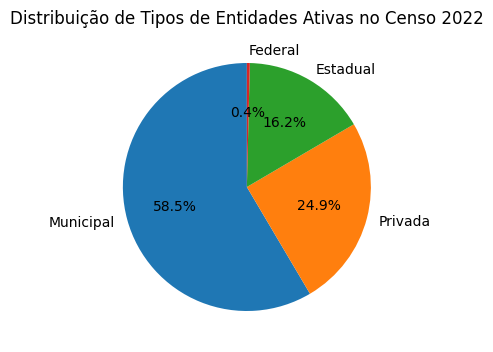

In [60]:
#Comparativo de entidades Particulares X Demais (ativas)
# Contando o número de linhas para cada tipo na coluna 'TIPO' e filtrando somente as ativas

df_filtrado = df_censo[df_censo['TP_SITUACAO_FUNCIONAMENTO'] == 'Em Atividade']
contagem_dependencia = df_filtrado['TP_DEPENDENCIA'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(4, 8))
plt.pie(contagem_dependencia, labels=contagem_dependencia.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Tipos de Entidades Ativas no Censo 2022')
plt.show()

Do censo 2022, podemos observar que temos um mercado de 24,9% de escolas de ensino privado, sendo este o nosso foco de pesquisa.


Com todos os filtros e limpezas realizadas vamos trabalhar agora com um data frame que inclui somente as entidades privadas em funcionamento pelo censo.

In [61]:
#Criando novo data frame somente com escolas de ensino privado e ativas
df_pv = df_censo[(df_censo['TP_DEPENDENCIA'] == 'Privada') & (df_censo['TP_SITUACAO_FUNCIONAMENTO'] == 'Em Atividade')]
df_pv = df_pv.reset_index(drop=True)
#print(df_pv.head(5))



In [62]:
#Contagem de linhas e colunas restantes
df_pv.shape

(45977, 146)

Existe uma subdivisão na categoria de escolas privadas, conforme vemos abaixo

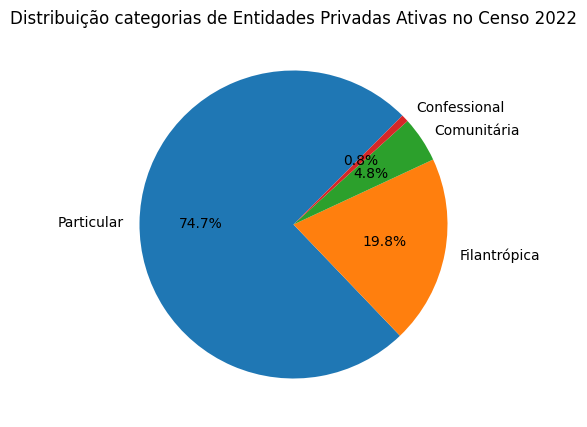

In [63]:
# Contando o número de linhas para cada tipo na coluna 'TP_CATEGORIA_ESCOLA_PRIVADA'
cat_priv = df_pv['TP_CATEGORIA_ESCOLA_PRIVADA'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(6, 5))
plt.pie(cat_priv, labels=cat_priv.index, autopct='%1.1f%%', startangle=45)
plt.title('Distribuição categorias de Entidades Privadas Ativas no Censo 2022')
plt.show()

Do nosso conjuto de escolas privadas vamos focar nossos esforços na do tipo **particular** que representam 74,7% dos tipos de escolas privadas, alterando nosso dataFrame para assumir somentes estas entidades ativas, privadas e do tipo particular.


In [64]:
df_pv['TP_DEPENDENCIA'].value_counts()

Privada    45977
Name: TP_DEPENDENCIA, dtype: int64

In [65]:
# Alterando data frame com os filtros finais

df_pvp = df_pv[(df_pv['TP_DEPENDENCIA'] == 'Privada')  & (df_pv['TP_CATEGORIA_ESCOLA_PRIVADA'] == 'Particular') & (df_pv['TP_SITUACAO_FUNCIONAMENTO'] == 'Em Atividade')]

# Reindexar o novo DataFrame
df_pvp = df_pvp.reset_index(drop=True)


Apagando todos os data Frames criados anteriormente e demais variáveis, assim limpando a memória.

In [66]:
del  csv_2022, df_2022, df_censo, colNovoCENSO,colexpurgoCENSO, mapeamento, df_filtrado, contagem_dependencia, df_pv, cat_priv


### Releitura da analise exploratória do Data Frame Final

In [67]:
#Ralizando novas analises
df_pvp.head(5)

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,2022,Norte,1,Rondônia,RO,11,Ariquemes,1100023,Leste Rondoniense,2,...,7.0,5.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0
1,2022,Norte,1,Rondônia,RO,11,Ariquemes,1100023,Leste Rondoniense,2,...,13.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0
2,2022,Norte,1,Rondônia,RO,11,Ariquemes,1100023,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0
3,2022,Norte,1,Rondônia,RO,11,Ariquemes,1100023,Leste Rondoniense,2,...,0.0,0.0,6.0,6.0,0.0,0.0,0.0,2.0,2.0,0.0
4,2022,Norte,1,Rondônia,RO,11,Ariquemes,1100023,Leste Rondoniense,2,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
#Estatísticas do data Frame
print(df_pvp.describe())

       NU_ANO_CENSO     CO_REGIAO         CO_UF  CO_MUNICIPIO  CO_MESORREGIAO  \
count       31174.0  31174.000000  31174.000000  3.117400e+04    31174.000000   
mean         2022.0      2.863957     32.624591  3.279273e+06        6.167768   
std             0.0      0.924647      8.293573  8.315928e+05        4.294669   
min          2022.0      1.000000     11.000000  1.100023e+06        1.000000   
25%          2022.0      2.000000     27.000000  2.704807e+06        3.000000   
50%          2022.0      3.000000     33.000000  3.304557e+06        5.000000   
75%          2022.0      3.000000     35.000000  3.550308e+06        7.000000   
max          2022.0      5.000000     53.000000  5.300108e+06       15.000000   

       CO_MICRORREGIAO   CO_DISTRITO   CO_ENTIDADE  TP_LOCALIZACAO  \
count     31174.000000  3.117400e+04  3.117400e+04    31174.000000   
mean         24.363572  3.279273e+08  3.283429e+07        1.008501   
std          18.409378  8.315928e+07  8.275155e+06        0.

In [69]:
# Verificando valores unicos e suas contagens
print(df_pvp.nunique())

NU_ANO_CENSO        1
NO_REGIAO           5
CO_REGIAO           5
NO_UF              27
SG_UF              27
                   ..
QT_TUR_EJA_FUND    22
QT_TUR_EJA_MED     32
QT_TUR_ESP         52
QT_TUR_ESP_CC      51
QT_TUR_ESP_CE      21
Length: 146, dtype: int64


In [70]:
# Devido ao tamanho da base a função de correlação não será utilizada neste primeiro momento
df_pvp.corr()

<ipython-input-70-5c4df90aee54>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_pvp.corr()


,NU_ANO_CENSO,CO_REGIAO,CO_UF,CO_MUNICIPIO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_DISTRITO,CO_ENTIDADE,TP_LOCALIZACAO,TP_LOCALIZACAO_DIFERENCIADA,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
NU_ANO_CENSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_REGIAO,NaN,1.000000,0.973210,0.972074,0.111403,0.111915,0.972074,0.972091,-0.037770,-0.014139,...,-0.041242,0.034173,0.021139,0.018934,0.011738,0.003461,0.015485,-0.038913,-0.040352,0.005497
CO_UF,NaN,0.973210,1.000000,0.999782,0.149426,0.149253,0.999782,0.999793,-0.032168,-0.012275,...,-0.037560,0.033972,0.011775,0.011316,0.006159,-0.000332,0.009510,-0.048768,-0.050680,0.007521
CO_MUNICIPIO,NaN,0.972074,0.999782,1.000000,0.162306,0.163010,1.000000,0.999691,-0.032593,-0.012383,...,-0.037064,0.034550,0.011883,0.011479,0.005560,-0.000652,0.008812,-0.049282,-0.051300,0.008101
CO_MESORREGIAO,NaN,0.111403,0.149426,0.162306,1.000000,0.972564,0.162306,0.153871,-0.038033,-0.007307,...,0.020328,0.037851,0.003933,0.004726,-0.029769,-0.021083,-0.031331,-0.037873,-0.044149,0.033689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QT_TUR_EJA_FUND,NaN,0.003461,-0.000332,-0.000652,-0.021083,-0.020629,-0.000652,-0.000422,-0.001954,-0.000989,...,0.003587,0.037340,0.025382,0.025697,0.870048,1.000000,0.668136,0.132493,0.128705,0.031780
QT_TUR_EJA_MED,NaN,0.015485,0.009510,0.008812,-0.031331,-0.033483,0.008812,0.009280,-0.006824,-0.001467,...,-0.006059,0.041059,0.093210,0.095466,0.948097,0.668136,1.000000,0.125789,0.127709,-0.001901
QT_TUR_ESP,NaN,-0.038913,-0.048768,-0.049282,-0.037873,-0.041604,-0.049282,-0.050475,-0.018012,-0.004797,...,0.527964,0.354611,0.176188,0.170281,0.139966,0.132493,0.125789,1.000000,0.985468,0.158116
QT_TUR_ESP_CC,NaN,-0.040352,-0.050680,-0.051300,-0.044149,-0.047837,-0.051300,-0.052463,-0.017837,-0.004750,...,0.519974,0.360723,0.179058,0.173196,0.139619,0.128705,0.127709,0.985468,1.000000,-0.011906


# 6 - Análises

Vamos basear nossas análises agora voltado para o novo data frame df_pvp (Entidades privadas particulares ativas)

In [71]:
#Número de Linhas e Colunas no Dafa frame
df_pvp.shape

(31174, 146)

In [72]:
#DETERMINANDO NUMERO DE MATRICULAS POR ESTADO

df_pvp.groupby('NO_UF')['QT_MAT_BAS'].sum().sort_values(ascending=False).nlargest(27)

NO_UF
São Paulo              1725033.0
Rio de Janeiro          915839.0
Minas Gerais            531323.0
Bahia                   476052.0
Pernambuco              459652.0
Ceará                   335488.0
Paraná                  306001.0
Rio Grande do Sul       277843.0
Santa Catarina          208298.0
Goiás                   205680.0
Pará                    204760.0
Paraíba                 170686.0
Rio Grande do Norte     162560.0
Maranhão                154988.0
Distrito Federal        143880.0
Alagoas                 124210.0
Sergipe                 107688.0
Espírito Santo           96661.0
Piauí                    87541.0
Mato Grosso              86184.0
Mato Grosso do Sul       79529.0
Amazonas                 75586.0
Tocantins                29712.0
Rondônia                 27312.0
Amapá                    16809.0
Roraima                  13503.0
Acre                     11217.0
Name: QT_MAT_BAS, dtype: float64

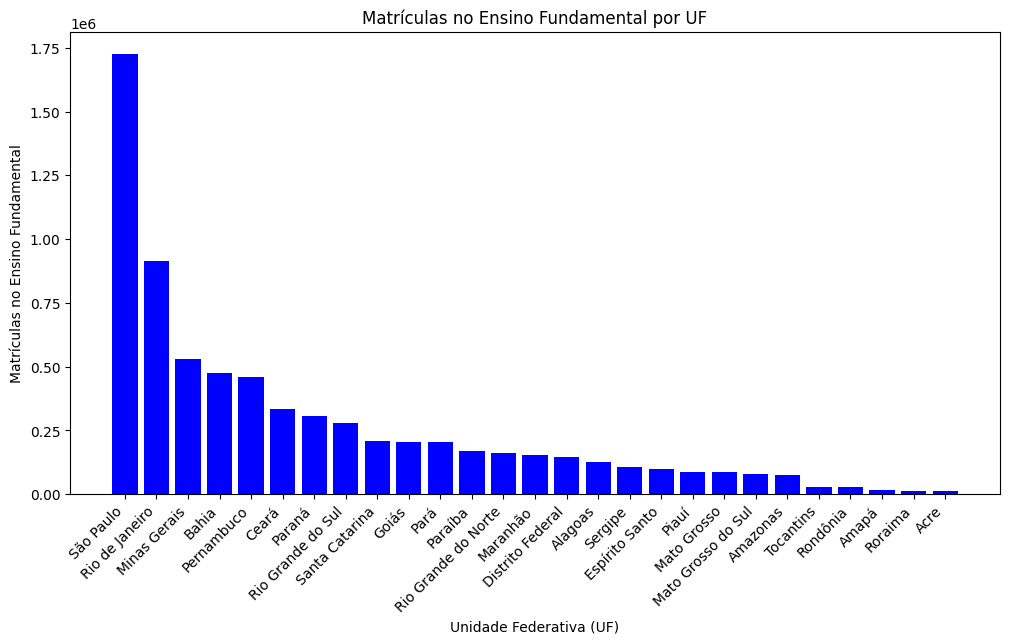

In [73]:
#Gráfico relacionado
matEst = df_pvp.groupby('NO_UF')['QT_MAT_BAS'].sum().sort_values(ascending=False).reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(matEst['NO_UF'], matEst['QT_MAT_BAS'], color='blue')
plt.xlabel('Unidade Federativa (UF)')
plt.ylabel('Matrículas no Ensino Fundamental')
plt.title('Matrículas no Ensino Fundamental por UF')
plt.xticks(rotation=45, ha='right')
plt.show()

Conforme gráfico acima, podemos perceber que nossa maior concentração de matriculas do ensino básico se concentram nos 5 primeiros estados.

Abaixo, distribuimos a análise em regiões da federação, onde se torna notório que as matriculas se concentram no:
* Sudeste (alanvancado por SP, RJ e MG)
* Nordeste (alavancado por BA, PE e CE)

In [74]:
#Tabela com matriculas por região do País

df_pvp.groupby('NO_REGIAO')['QT_MAT_BAS'].sum().sort_values(ascending=False).nlargest(27)

NO_REGIAO
Sudeste         3268856.0
Nordeste        2078865.0
Sul              792142.0
Centro-Oeste     515273.0
Norte            378899.0
Name: QT_MAT_BAS, dtype: float64

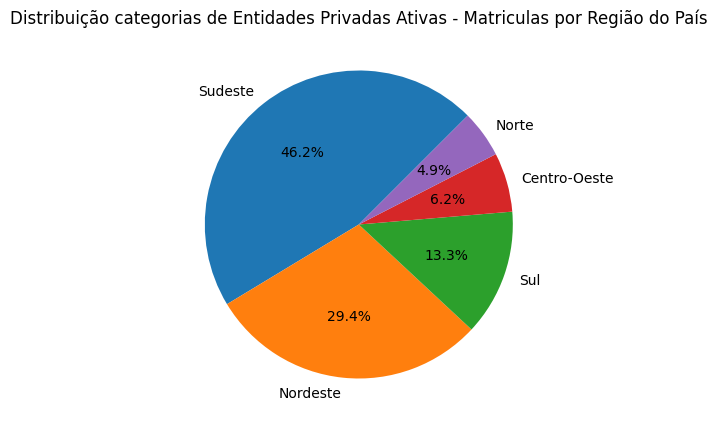

In [75]:
cat_priv = df_pvp['NO_REGIAO'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(6, 5))
plt.pie(cat_priv, labels=cat_priv.index, autopct='%1.1f%%', startangle=45)
plt.title('Distribuição categorias de Entidades Privadas Ativas - Matriculas por Região do País')
plt.show()

Vamos iniciar uma análise de matrículas por faixa etária conforme distribuidas no censo, assim podemos compreender melhor o nosso público de 2022, podendo presumir os números dos anos posteriores, neste caso seria ideal termos também a % de reporvados, assim poderíamos projetar numeros mais assertivos, sendo interessante se tivéssimo os números de idade mais detalhados.

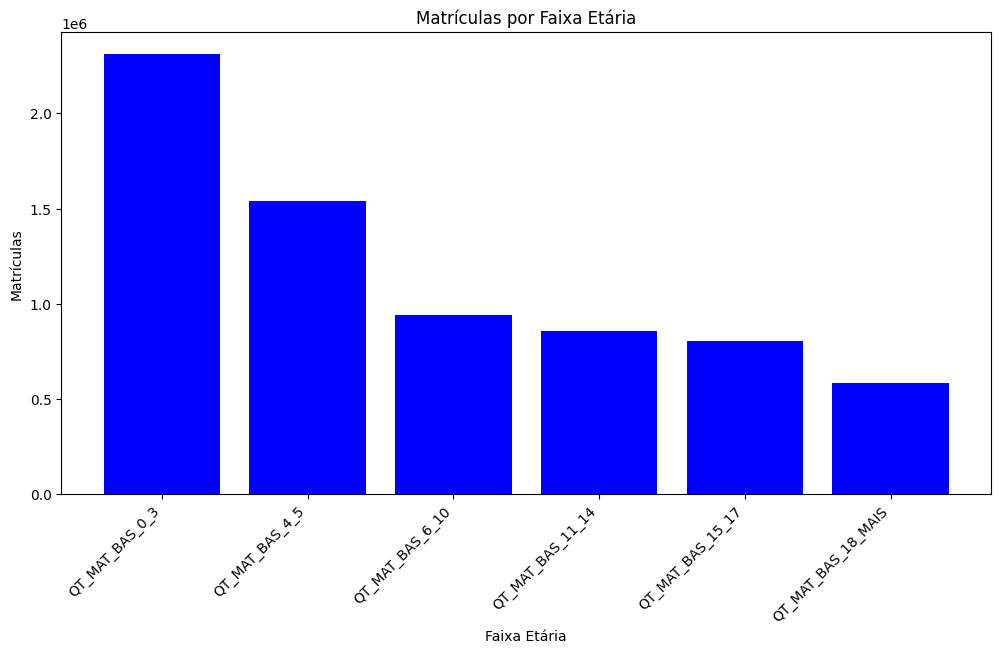

In [76]:
# Vamo utilizar as colunas de faixar etárias
colunas_selecionadas = ['QT_MAT_BAS_0_3', 'QT_MAT_BAS_4_5', 'QT_MAT_BAS_6_10', 'QT_MAT_BAS_11_14', 'QT_MAT_BAS_15_17', 'QT_MAT_BAS_18_MAIS']

# Somar as colunas para cada linha
df_pvp['Soma_Matriculas'] = df_pvp[colunas_selecionadas].sum(axis=1)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(colunas_selecionadas, df_pvp[colunas_selecionadas].sum().sort_values(ascending=False), color='blue')
plt.xlabel('Faixa Etária')
plt.ylabel('Matrículas')
plt.title('Matrículas por Faixa Etária')
plt.xticks(rotation=45, ha='right')
plt.show()

Podemos constatar que a faixa etária onde se concentram o maior número de matriculas esta entre 0 e 3 anos e de 4 a 5 anos, onde há uma queda que pode indicar uma evasão para outras entidades não particulares.

Analises de correlação

In [96]:
#Analise descritiva de matriculas por faixa etaria

corEstMat= ['NO_UF','QT_MAT_BAS_0_3','QT_MAT_BAS_4_5','QT_MAT_BAS_6_10','QT_MAT_BAS_11_14','QT_MAT_BAS_15_17','QT_MAT_BAS_18_MAIS']

df_corEstMat = df_pvp[corEstMat]
matriz = df_corEstMat.describe()
matriz.head(20)

,QT_MAT_BAS_0_3,QT_MAT_BAS_4_5,QT_MAT_BAS_6_10,QT_MAT_BAS_11_14,QT_MAT_BAS_15_17,QT_MAT_BAS_18_MAIS
count,31103.000000,31103.000000,31103.000000,31103.000000,31103.000000,31103.000000
mean,18.816931,25.886892,74.257756,49.461467,27.529242,30.200656
std,25.027796,28.762962,98.662621,89.479554,72.538487,331.830028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000
50%,11.000000,19.000000,46.000000,3.000000,0.000000,0.000000
75%,27.000000,37.000000,107.000000,72.000000,17.000000,2.000000
max,475.000000,489.000000,1788.000000,1338.000000,1863.000000,40125.000000


In [97]:
corEstMat= ['QT_MAT_BAS']

df_corEstMat = df_pvp[corEstMat]
matriz = df_corEstMat.describe()
matriz.head(20)

,QT_MAT_BAS
count,31103.000000
mean,226.152943
std,406.803353
min,1.000000
25%,60.000000
50%,132.000000
75%,281.000000
max,40174.000000


Top Entidades em Matriculas no Ensino Basico

In [77]:
#Determinando TOP escolas com o maior número de matriculas no ensino basico
#utilizando os campos: NO_ENTIDADE /QT_MAT_BAS

df_pvp.groupby('NO_ENTIDADE')['QT_MAT_BAS'].sum().sort_values(ascending=False).nlargest(20)


NO_ENTIDADE
INSTITUTO MONITOR LTDA                                        53556.0
SENAC RIO GRANDE DO SUL                                       24164.0
SISTEMA ELITE DE ENSINO                                       15265.0
INSTITUTO BRASILEIRO DE EDUCACAO PROFISSIONAL ESTADO DE SP    10953.0
INSTITUTO TECNOLOGICO ASSESSORITEC                            10296.0
INSTITUTO BRASILEIRO DE ED PROFISSIONAL - IBREP                8950.0
ESCOLA SESI DE ENSINO MEDIO FRANCISCO XAVIER KUNST             8184.0
UNIDADE SESI RETIRO                                            7438.0
CENTRO DE PROFISSIONALIZACAO E EDUCACAO TECNICA                7315.0
COLEGIO SAGRADO CORACAO DE JESUS                               7257.0
INSTITUTO ATENEU                                               7242.0
INSTITUTO EDUCACIONAL MONITOR LTDA                             6778.0
ESCOLA TECNICA VENCER                                          6515.0
CENTRO DE ENSINO GRAU TECNICO                                  5871.0
COLEGIO 

# Interpretação e Conclusões